In [1]:
# allows matplots to be shown in the document
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import statistics
import scipy.stats as sts 
import matplotlib as mpl 
import matplotlib.dates as mdates
 


In [3]:
# import the data sheets as pandas dataframes
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")


In [4]:
# merge the two dfs into one
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [5]:
# Create groupby values for each city type
total_rides_summary = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers_summary = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares_summary = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_per_ride_by_type = total_fares_summary / total_rides_summary
fare_per_driver_by_type = total_fares_summary / total_drivers_summary
fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [6]:
# Create dataframe for city type summary
city_type_summary = pd.DataFrame({"Total Rides": total_rides_summary, "Total Drivers": total_drivers_summary, "Total Fares": total_fares_summary, "Average Fare per Ride": fare_per_ride_by_type, "Average Fare per Driver": fare_per_driver_by_type})
city_type_summary.index.name = None
city_type_summary["Total Rides"] = city_type_summary["Total Rides"].map("{:,}".format)
city_type_summary["Total Drivers"] = city_type_summary["Total Drivers"].map("{:,}".format)
city_type_summary["Total Fares"] = city_type_summary["Total Fares"].map("${:,.2f}".format)
city_type_summary["Average Fare per Ride"] = city_type_summary["Average Fare per Ride"].map("${:.2f}".format)
city_type_summary["Average Fare per Driver"] = city_type_summary["Average Fare per Driver"].map("${:.2f}".format)
city_type_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [7]:
# Rename the columns in the pyber data
pyber_data_df.rename(columns = {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)

pyber_data_df.set_index('Date', inplace=True)

In [8]:
# Create new df using the desired columns
fare_by_date_summary = pyber_data_df[["City Type", "Fare"]].copy()
fare_by_date_summary

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [9]:
# Set Date column to datetime and set it as the index
fare_by_date_summary.index = pd.to_datetime(fare_by_date_summary.index)

In [10]:
fare_by_date_summary

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [11]:
# Group by Date and City Type and get sums
fare_by_date_groupby = fare_by_date_summary.groupby(["Date", "City Type"]).sum()

In [12]:
# Pivot by the City Type to create a new df with sums for city types by date
fare_pivot = pd.pivot_table(fare_by_date_groupby, index='Date', values='Fare', columns='City Type')

In [13]:
# Use loc to reduce the range of time we are viewing
date_window_fare_df = fare_pivot.loc['2019-01-01':'2019-04-28']

In [14]:
# Use resample() to combine the data into weekly dates
date_window_fare_resample_df = date_window_fare_df.resample('W').sum()

In [15]:
# view the new df
date_window_fare_resample_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


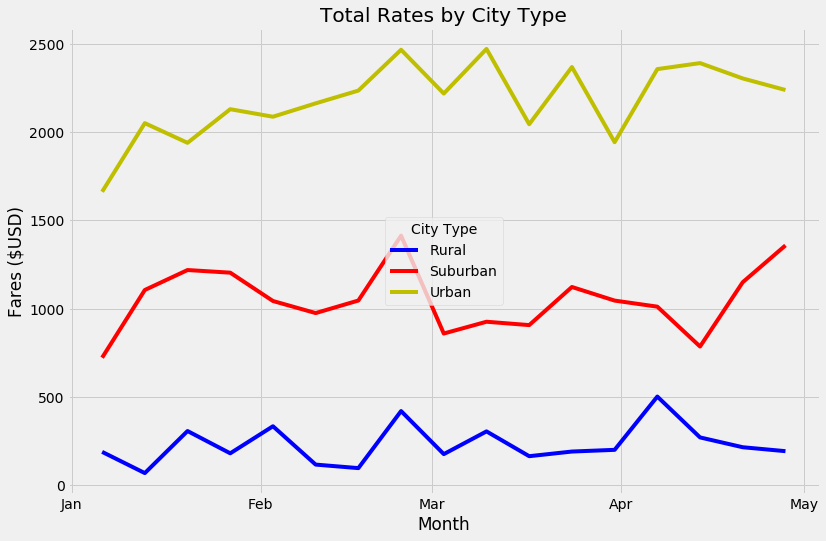

In [16]:
# Create object oriented line chart comparing total weekly rates by city type 
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Total Rates by City Type')
ax.set_xlabel('Month')
ax.set_ylabel('Fares ($USD)')
ax.plot(date_window_fare_resample_df['Rural'], label='Rural', color='b')
ax.plot(date_window_fare_resample_df['Suburban'],label='Suburban', color='r')
ax.plot(date_window_fare_resample_df['Urban'], label='Urban', color='y')
ax.legend(title='City Type', loc='center')
date_format = '%b'
ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Save Figure
plt.savefig("analysis/TotalRatesWeekly.png")
